**Disclaimer:** This page is **not** a comprehensive reference of `pandas` library, it only covers a few parts of it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([11, 22, 33, 44, 55], index=pd.Index(['1', '2', '3', '4', '5'], name='day'))
s

day
1    11
2    22
3    33
4    44
5    55
dtype: int64

In [3]:
s.index

Index(['1', '2', '3', '4', '5'], dtype='object', name='day')

In [4]:
s.values

array([11, 22, 33, 44, 55])

In [5]:
s[['1', '2']]

day
1    11
2    22
dtype: int64

In [6]:
df = pd.DataFrame(
    [[1, 'Apple', 3.14], [2, 'Pear', 64], [3, 'Lemon', 77]], 
    columns=['Idx', 'Fruit', 'Value'], 
    index=['a1', 'p1', 'l1']
)
df

,Idx,Fruit,Value
a1,1,Apple,3.14
p1,2,Pear,64.00
l1,3,Lemon,77.00


In [7]:
df.index

Index(['a1', 'p1', 'l1'], dtype='object')

In [8]:
df.values

array([[1, 'Apple', 3.14],
       [2, 'Pear', 64.0],
       [3, 'Lemon', 77.0]], dtype=object)

In [9]:
df[['Idx', 'Fruit']]

,Idx,Fruit
a1,1,Apple
p1,2,Pear
l1,3,Lemon


In [10]:
df['Idx']

a1    1
p1    2
l1    3
Name: Idx, dtype: int64

In [11]:
df[df['Idx'] % 2 == 1]

,Idx,Fruit,Value
a1,1,Apple,3.14
l1,3,Lemon,77.00


In [12]:
df.iloc[1:]

,Idx,Fruit,Value
p1,2,Pear,64.0
l1,3,Lemon,77.0


In [13]:
df.loc['p1']

Idx         2
Fruit    Pear
Value    64.0
Name: p1, dtype: object

In [14]:
df.drop(['p1'])

,Idx,Fruit,Value
a1,1,Apple,3.14
l1,3,Lemon,77.00


In [15]:
df2 = df.drop(['Value'], axis='columns') # e.g. same as "df2 = df.copy()" and then "del df2['Fruit']"
df2

,Idx,Fruit
a1,1,Apple
p1,2,Pear
l1,3,Lemon


In [16]:
df2.T

,a1,p1,l1
Idx,1,2,3
Fruit,Apple,Pear,Lemon


In [17]:
df2.index = pd.Index(df2['Fruit'])
df2

,Idx,Fruit
Fruit,,
Apple,1,Apple
Pear,2,Pear
Lemon,3,Lemon


In [18]:
df2.reindex(['Lemon', 'Pear', 'Apple'])

,Idx,Fruit
Fruit,,
Lemon,3,Lemon
Pear,2,Pear
Apple,1,Apple


In [19]:
df3 = pd.DataFrame({'Name': ['john', 'brendon'], 'Age': [25, pd.NA]})
pd.isnull(df3)

,Name,Age
0,False,False
1,False,True


In [20]:
df3.dropna()

,Name,Age
0,john,25


In [21]:
df3['Name'].map(str.title)

0       John
1    Brendon
Name: Name, dtype: object

In [22]:
df3.Name.str.title()

0       John
1    Brendon
Name: Name, dtype: object

In [23]:
df3.applymap(lambda v: v[0:3] + '...' if isinstance(v, str) else v)

,Name,Age
0,joh...,25
1,bre...,<NA>


2    2
4    2
8    1
Name: cores, dtype: int64


<AxesSubplot:ylabel='Frequency'>

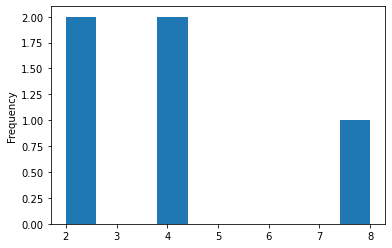

In [24]:
df4 = pd.DataFrame({'server': ['s1', 's2', 's3', 's4', 'l1'], 'cores': [2, 4, 4, 2, 8]})
print(df4['cores'].value_counts())
df4['cores'].plot.hist()

In [25]:
s_h = pd.Series(
    np.arange(0, 9) + np.arange(0, 9) % 2 * 3, 
    index = [['A'] * 3 + ['B'] * 3 + ['C'] * 3, list(range(1, 4)) * 3],
)
s_h.index.names = ['gr_c', 'gr_n']
s_h.name = 'value'

s_h

gr_c  gr_n
A     1        0
      2        4
      3        2
B     1        6
      2        4
      3        8
C     1        6
      2       10
      3        8
Name: value, dtype: int64

In [26]:
s_h.groupby(level='gr_c').sum()

gr_c
A     6
B    18
C    24
Name: value, dtype: int64

In [27]:
print("s_h['A']")
print(s_h['A'], "\n")

print("s_h['A':'B']")
print(s_h['A':'B'], "\n")

print("s_h['A','C']")
print(s_h[['A','C']], "\n")

s_h['A']
gr_n
1    0
2    4
3    2
Name: value, dtype: int64 

s_h['A':'B']
gr_c  gr_n
A     1       0
      2       4
      3       2
B     1       6
      2       4
      3       8
Name: value, dtype: int64 

s_h['A','C']
gr_c  gr_n
A     1        0
      2        4
      3        2
C     1        6
      2       10
      3        8
Name: value, dtype: int64 



In [28]:
s_h.unstack(level=0)

gr_c,A,B,C
gr_n,,,
1,0,6,6
2,4,4,10
3,2,8,8


In [29]:
s_h.unstack(level=1)

gr_n,1,2,3
gr_c,,,
A,0,4,2
B,6,4,8
C,6,10,8


In [30]:
s_h.swaplevel().sort_index(level=0)

gr_n  gr_c
1     A        0
      B        6
      C        6
2     A        4
      B        4
      C       10
3     A        2
      B        8
      C        8
Name: value, dtype: int64

In [31]:
df5 = pd.DataFrame(s_h)
df5['value2'] = [8, 2, 3, 1, 6, 9, 9, 1, 2]
df5.head(5)

value  value2
gr_c gr_n               
A    1         0       8
     2         4       2
     3         2       3
B    1         6       1
     2         4       6

In [32]:
df6 = df5.reset_index()
df6.head(3)

,gr_c,gr_n,value,value2
0,A,1,0,8
1,A,2,4,2
2,A,3,2,3


In [33]:
df6.set_index(['gr_n', 'gr_c']).head(3)

,,value,value2
gr_n,gr_c,,
1,A,0,8
2,A,4,2
3,A,2,3


In [34]:
df7 = df5.copy()
df7.columns = ['cc', 'cc2']

df5.join(df7) # same as "pd.merge(df5, df7, left_index=True, right_index=True)"

value  value2  cc  cc2
gr_c gr_n                        
A    1         0       8   0    8
     2         4       2   4    2
     3         2       3   2    3
B    1         6       1   6    1
     2         4       6   4    6
     3         8       9   8    9
C    1         6       9   6    9
     2        10       1  10    1
     3         8       2   8    2

In [35]:
pd.concat([df5, df5])

value  value2
gr_c gr_n               
A    1         0       8
     2         4       2
     3         2       3
B    1         6       1
     2         4       6
     3         8       9
C    1         6       9
     2        10       1
     3         8       2
A    1         0       8
     2         4       2
     3         2       3
B    1         6       1
     2         4       6
     3         8       9
C    1         6       9
     2        10       1
     3         8       2

In [36]:
df5_long = df5.reset_index().melt(['gr_c', 'gr_n'], value_name='data')
df5_long

,gr_c,gr_n,variable,data
0,A,1,value,0
1,A,2,value,4
2,A,3,value,2
3,B,1,value,6
4,B,2,value,4
5,B,3,value,8
6,C,1,value,6
7,C,2,value,10
8,C,3,value,8
9,A,1,value2,8


In [37]:
df5_long.pivot(['gr_c', 'gr_n'], 'variable', 'data')

variable   value  value2
gr_c gr_n               
A    1         0       8
     2         4       2
     3         2       3
B    1         6       1
     2         4       6
     3         8       9
C    1         6       9
     2        10       1
     3         8       2

In [38]:
np.random.seed(777)
df6 = pd.DataFrame({'class': ['a', 'b', 'c', 'd'] * 100, 'value': np.random.randn(4 * 100)})
df6.head()

,class,value
0,a,-0.468209
1,b,-0.822825
2,c,-0.065380
3,d,-0.713362
4,a,0.906351


In [39]:
df6.groupby('class').agg(['count', 'mean', 'min', 'max'])

value                              
      count      mean       min       max
class                                    
a       100 -0.013131 -1.752445  1.949068
b       100 -0.032241 -2.358594  2.477233
c       100  0.204570 -2.656149  2.479370
d       100 -0.166678 -2.567137  1.895161

In [40]:
df6.groupby('class').apply(lambda values: values.sum() / values.count())

,value
class,
a,-0.013131
b,-0.032241
c,0.204570
d,-0.166678


In [41]:
df6['class'] = df6['class'].astype('category') # pd.Categorical
df6['class']

0      a
1      b
2      c
3      d
4      a
      ..
395    d
396    a
397    b
398    c
399    d
Name: class, Length: 400, dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [42]:
pd.cut(df6['value'], bins=4)

0      (-1.372, -0.0884]
1      (-1.372, -0.0884]
2       (-0.0884, 1.195]
3      (-1.372, -0.0884]
4       (-0.0884, 1.195]
             ...        
395     (-0.0884, 1.195]
396     (-0.0884, 1.195]
397    (-1.372, -0.0884]
398    (-1.372, -0.0884]
399    (-1.372, -0.0884]
Name: value, Length: 400, dtype: category
Categories (4, interval[float64, right]): [(-2.661, -1.372] < (-1.372, -0.0884] < (-0.0884, 1.195] < (1.195, 2.479]]

In [43]:
print(pd.cut(df6['value'], bins=4).value_counts())

(-0.0884, 1.195]     168
(-1.372, -0.0884]    156
(1.195, 2.479]        44
(-2.661, -1.372]      32
Name: value, dtype: int64


In [44]:
pd.qcut(df6['value'], q=4)

0      (-0.608, -0.00282]
1        (-2.657, -0.608]
2      (-0.608, -0.00282]
3        (-2.657, -0.608]
4          (0.618, 2.479]
              ...        
395     (-0.00282, 0.618]
396     (-0.00282, 0.618]
397      (-2.657, -0.608]
398      (-2.657, -0.608]
399    (-0.608, -0.00282]
Name: value, Length: 400, dtype: category
Categories (4, interval[float64, right]): [(-2.657, -0.608] < (-0.608, -0.00282] < (-0.00282, 0.618] < (0.618, 2.479]]

In [45]:
print(pd.qcut(df6['value'], q=4).value_counts())

(-2.657, -0.608]      100
(-0.608, -0.00282]    100
(-0.00282, 0.618]     100
(0.618, 2.479]        100
Name: value, dtype: int64


In [46]:
np.random.seed(654321)
ts1 = pd.Series(np.random.rand(100), index=pd.date_range('07/07/2007', periods=100))
ts1['07/07/2007':'07/10/2007']

2007-07-07    0.231994
2007-07-08    0.732530
2007-07-09    0.963090
2007-07-10    0.693172
Freq: D, dtype: float64

In [47]:
ts1.resample('M').mean()

2007-07-31    0.526987
2007-08-31    0.462461
2007-09-30    0.410313
2007-10-31    0.504087
Freq: M, dtype: float64

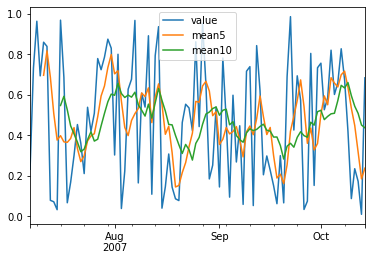

In [48]:
ts1.plot.line(label='value')
ts1.rolling(5).mean().plot.line(label='mean5')
ts1.rolling(10).mean().plot.line(label='mean10')

import matplotlib.pyplot as ppt
ppt.legend()